In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [210]:
data = pd.read_csv('E:\\GL\\processed.cleveland.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [211]:
data['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [212]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [213]:
data = data.replace('?',np.nan)
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [214]:
data['ca'] = data['ca'].fillna(data['ca'].mode()[0])
data['thal'] = data['thal'].fillna(data['thal'].mode()[0])

E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


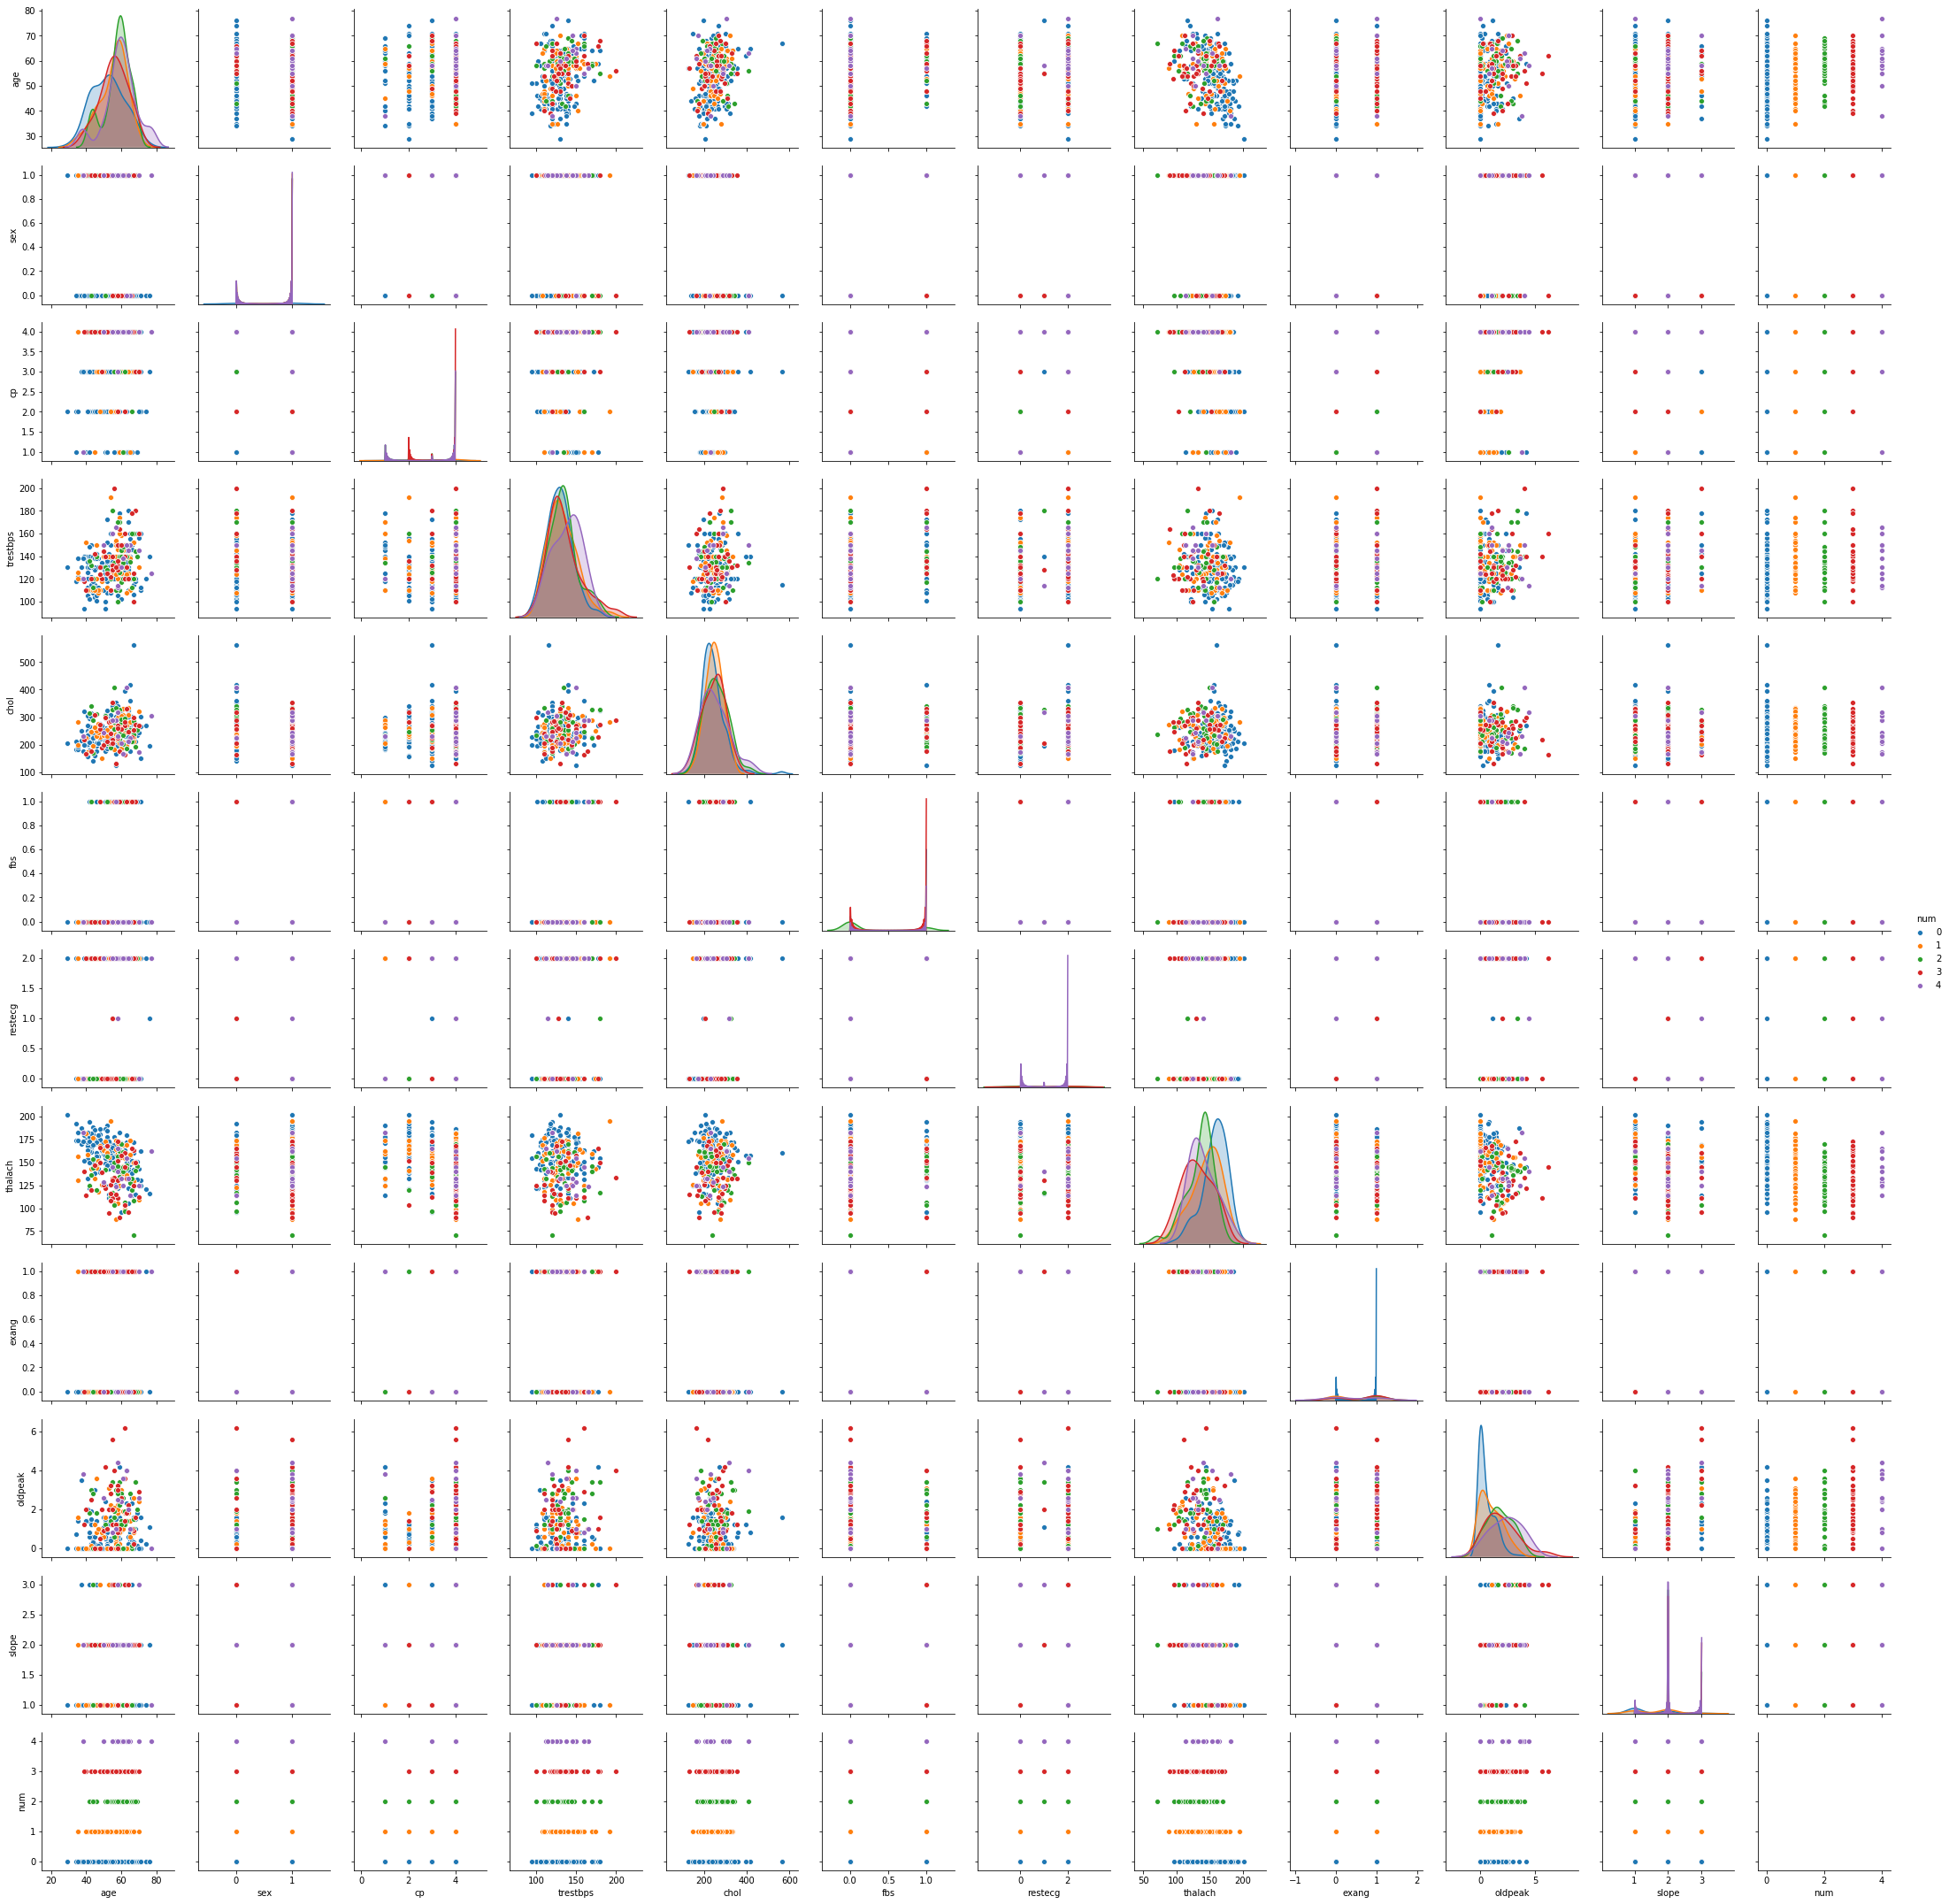

In [5]:
sns.pairplot(data,diag_kind='kde',hue='num')

In [215]:
data = data.drop(columns=['num','sex','cp','fbs','chol','thal','trestbps','restecg','exang','ca','age'])

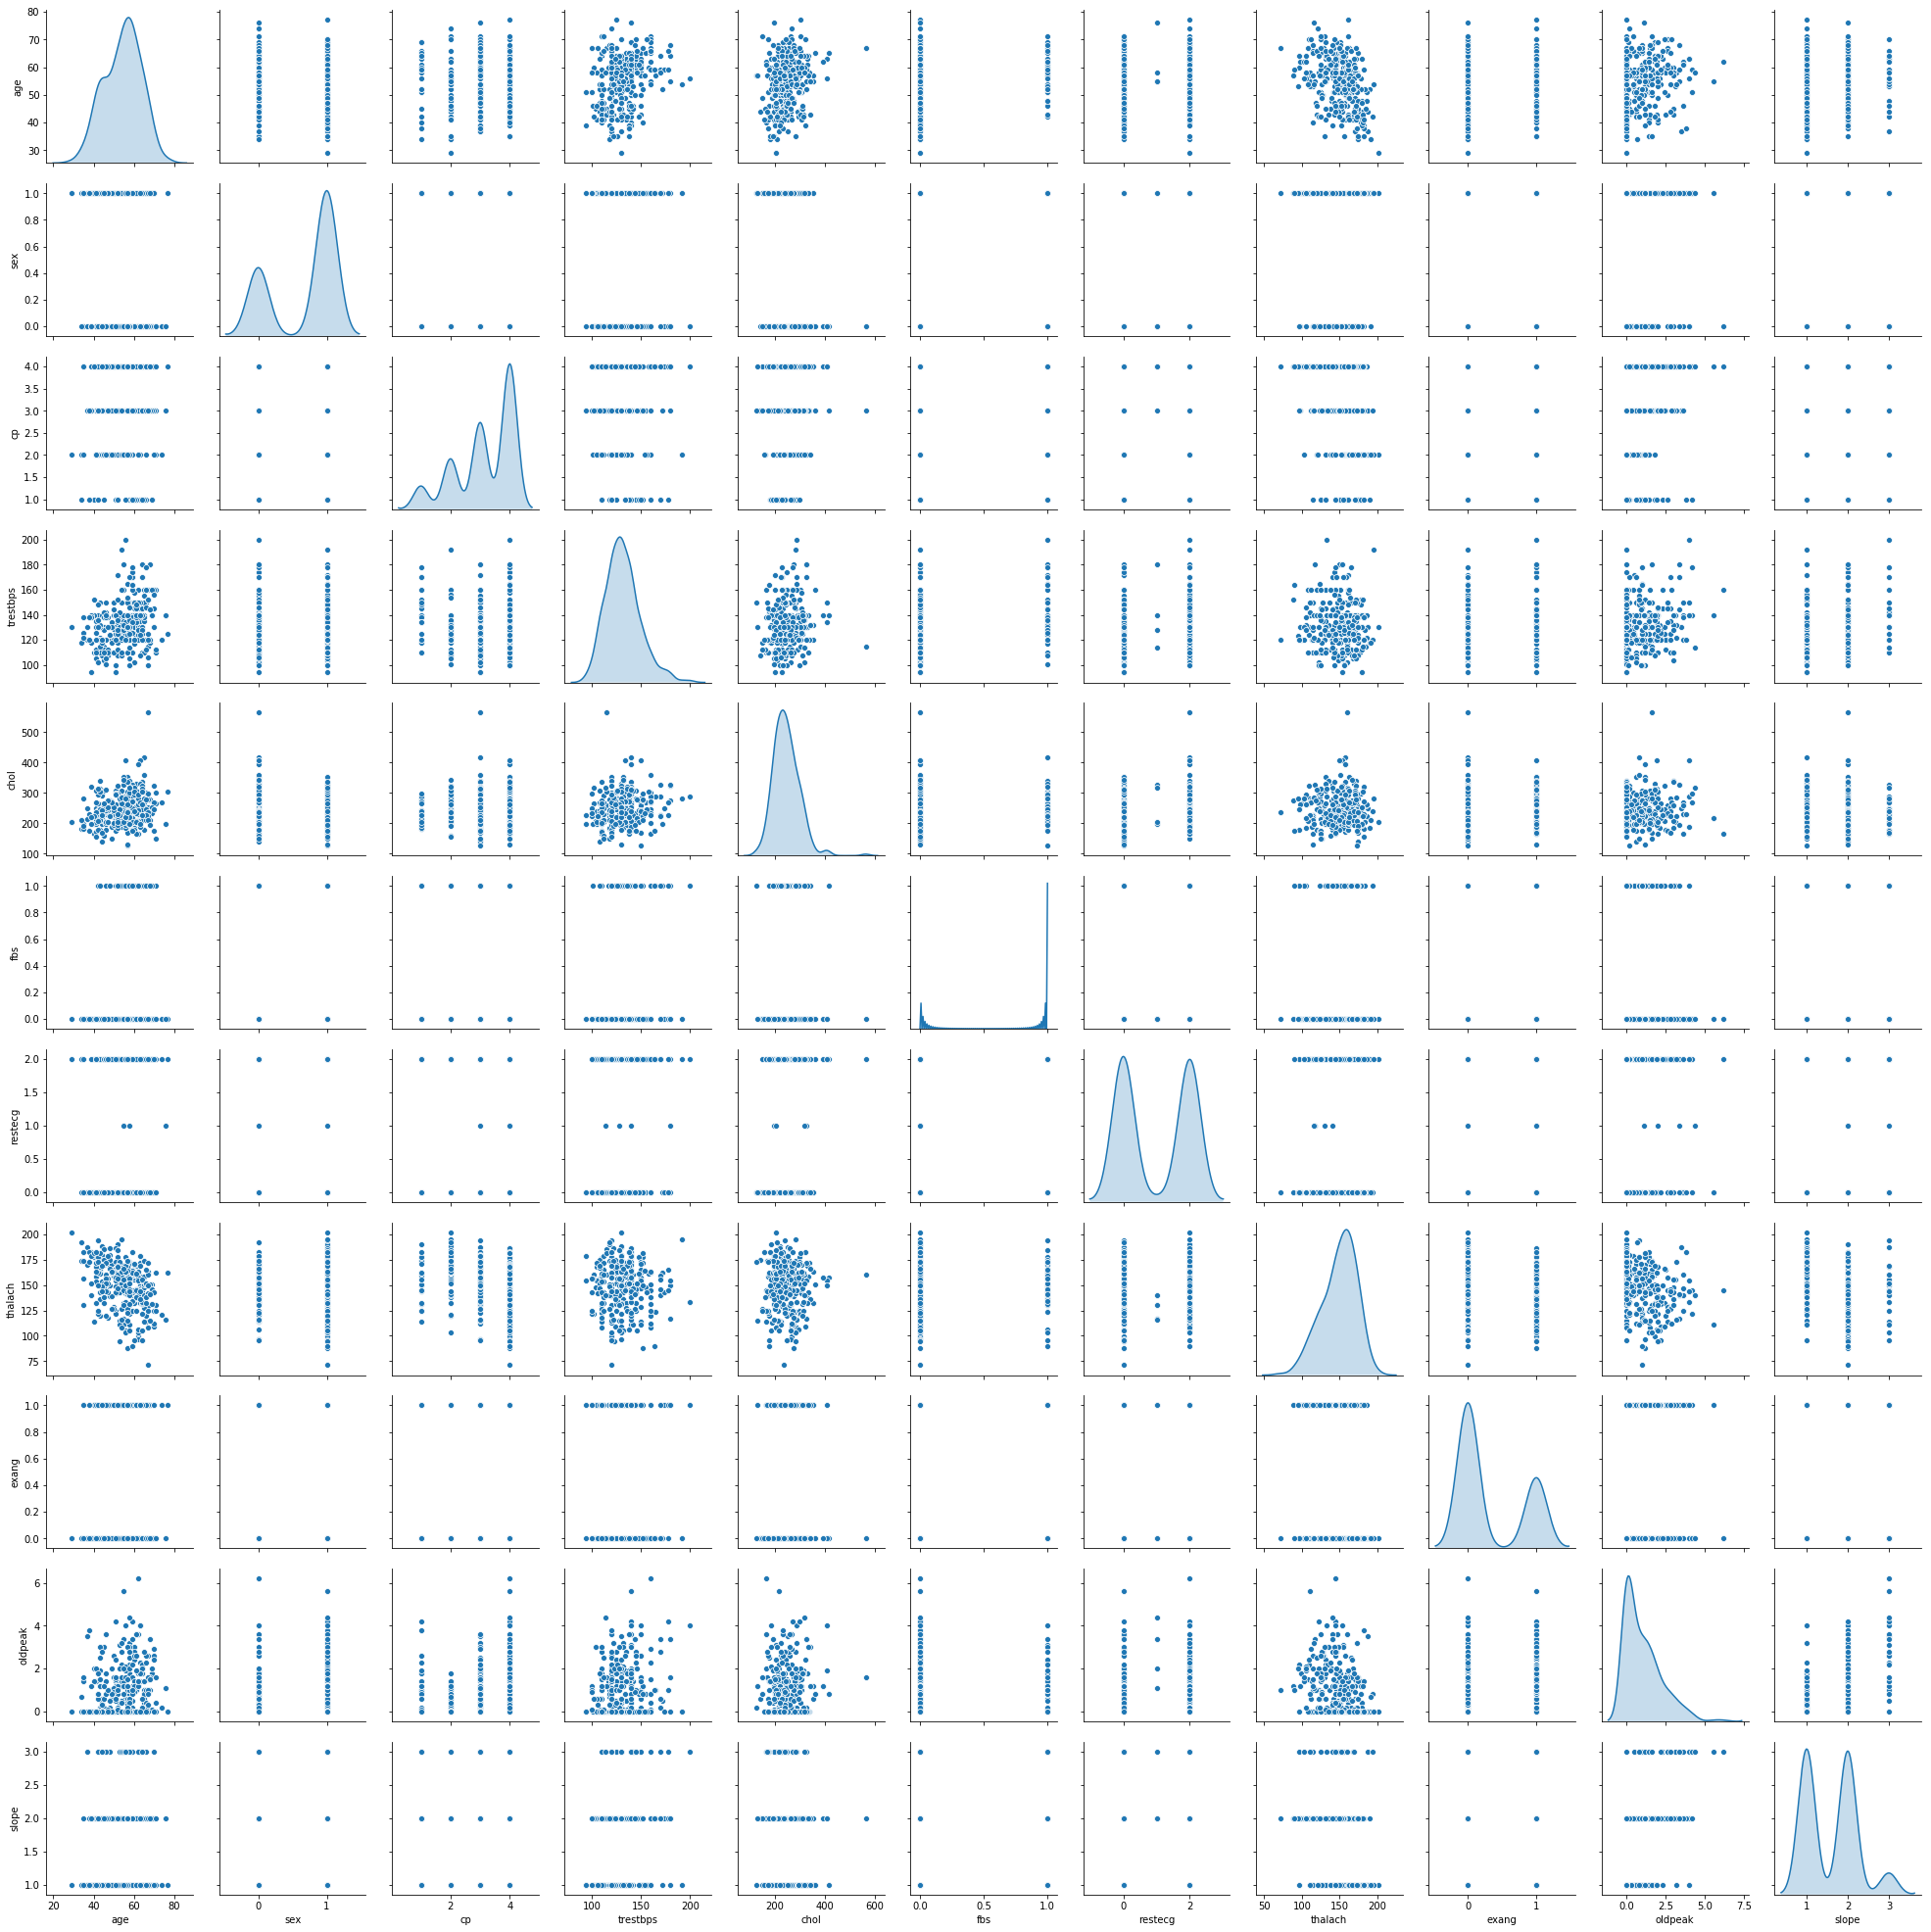

In [7]:
sns.pairplot(data,diag_kind='kde')

In [20]:
data['slope'].value_counts()

1    142
2    140
3     21
Name: slope, dtype: int64

In [216]:
sc = StandardScaler()
df_scaled = sc.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled,columns=data.columns)

In [217]:
df_scaled.head()

,thalach,oldpeak,slope
0,0.017197,1.087338,2.274579
1,-1.821905,0.397182,0.649113
2,-0.902354,1.346147,0.649113
3,1.637359,2.122573,2.274579
4,0.980537,0.310912,-0.976352


In [218]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,909.000000
1,2,497.860344
2,3,373.488449
3,4,283.474360
4,5,238.897560
5,6,206.725636
6,7,185.361485
7,8,166.107255
8,9,151.206048
9,10,137.385903


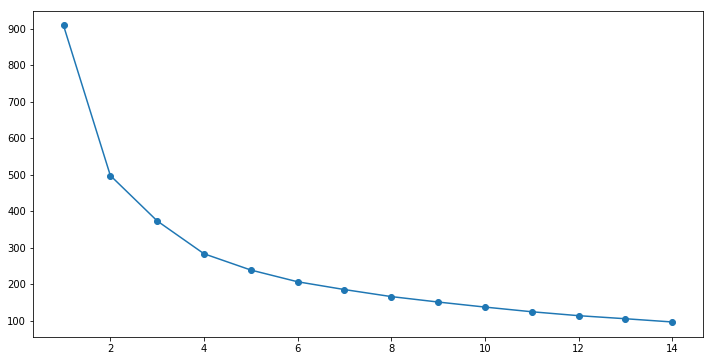

In [219]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [220]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [221]:
centroids=kmeans.cluster_centers_

In [222]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [223]:
centroid_df

,thalach,oldpeak,slope
0,-0.984676,1.305888,0.952533
1,0.480855,-0.566468,-0.976352
2,0.069542,-0.207697,0.761214


In [224]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [225]:
df_labeled = df_scaled.join(df_labels)

In [226]:
clusters = df_labeled.groupby(['labels'])
df0=clusters.get_group(0)
df1=clusters.get_group(1)
df2=clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

,thalach,oldpeak,slope,labels
0,0.017197,1.087338,2.274579,0
1,-1.821905,0.397182,0.649113,0
2,-0.902354,1.346147,0.649113,0
3,1.637359,2.122573,2.274579,0
6,0.455079,2.208842,2.274579,0


In [227]:
kmeans.inertia_

373.4884494915338

E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


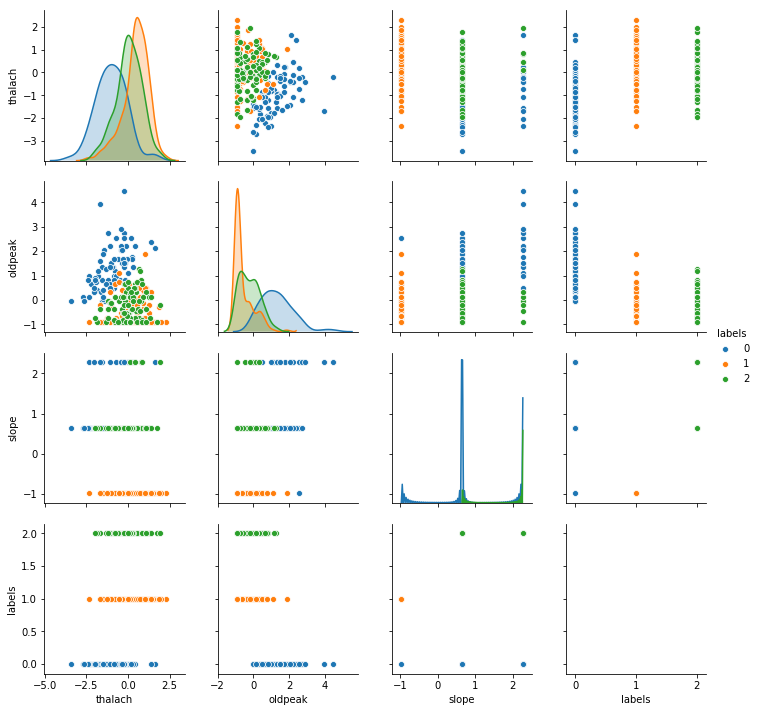

In [228]:
sns.pairplot(finaldf,diag_kind='kde',hue='labels')

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.41827689624716435


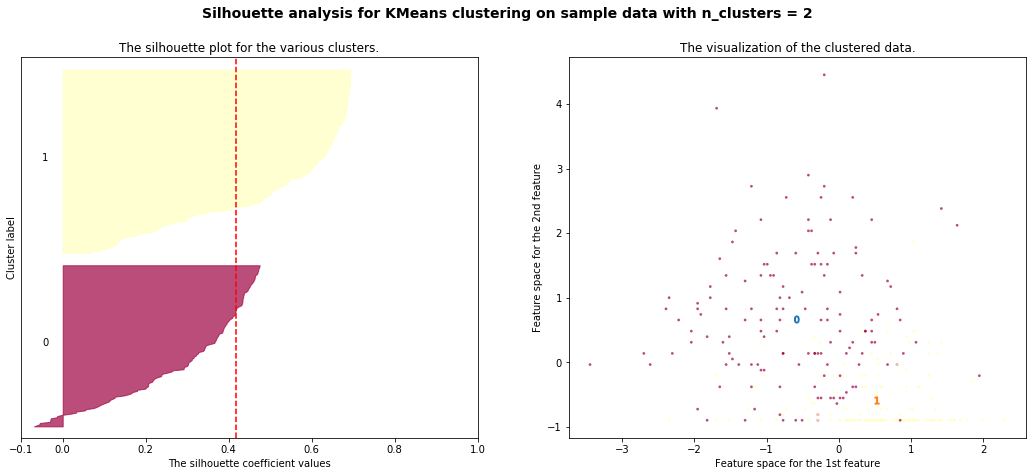

For n_clusters = 3 The average silhouette_score is : 0.39673985590675337


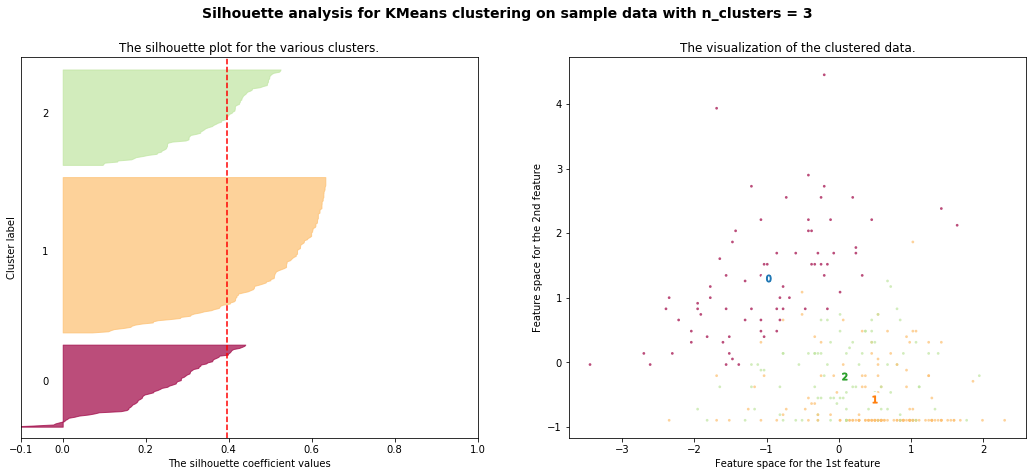

For n_clusters = 4 The average silhouette_score is : 0.42358211367677073


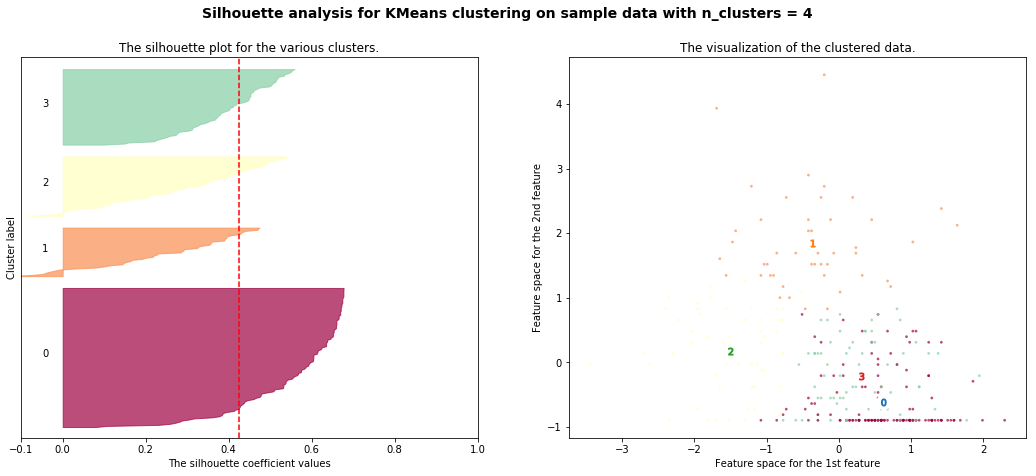

For n_clusters = 5 The average silhouette_score is : 0.405933623945854


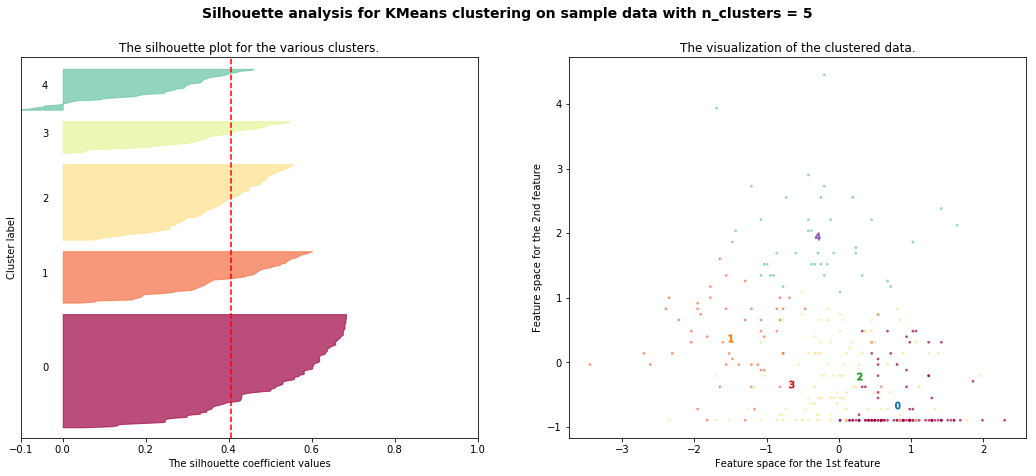

For n_clusters = 6 The average silhouette_score is : 0.41141522767794214


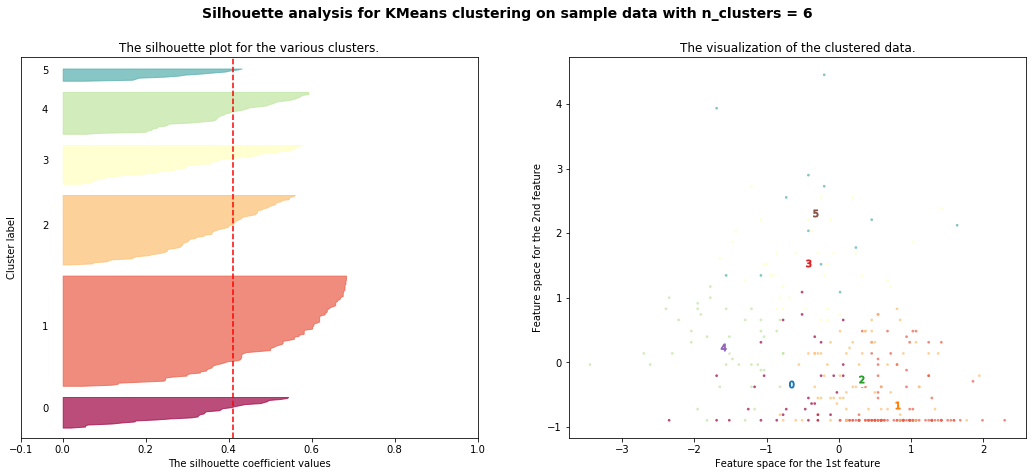

For n_clusters = 7 The average silhouette_score is : 0.4040094626354403


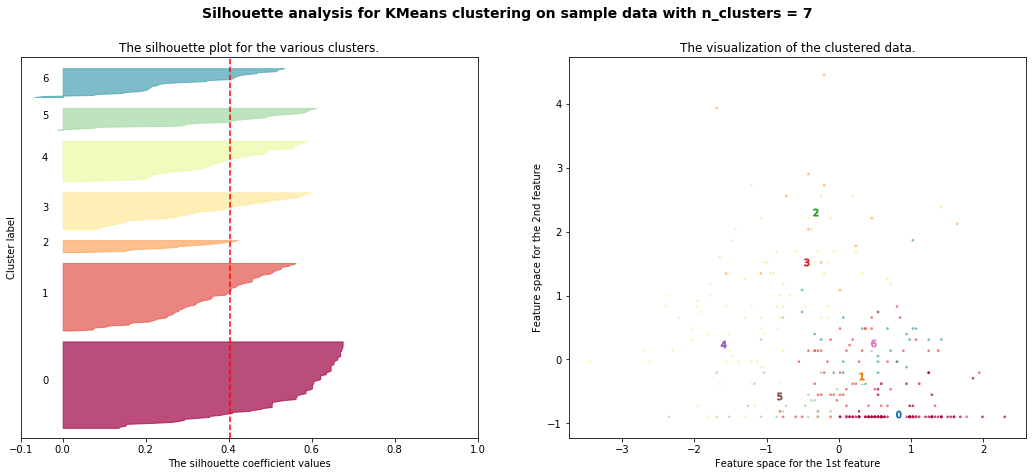

For n_clusters = 8 The average silhouette_score is : 0.3853863927691968


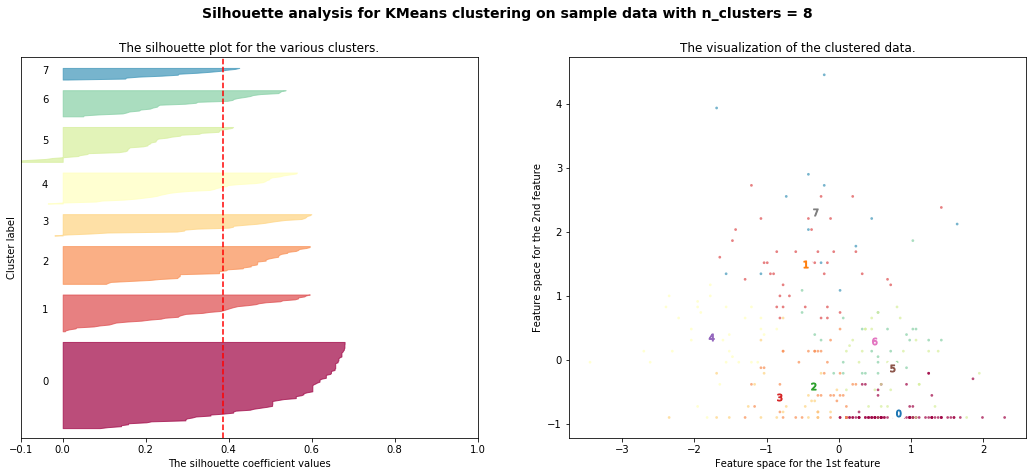

For n_clusters = 9 The average silhouette_score is : 0.37043359122196484


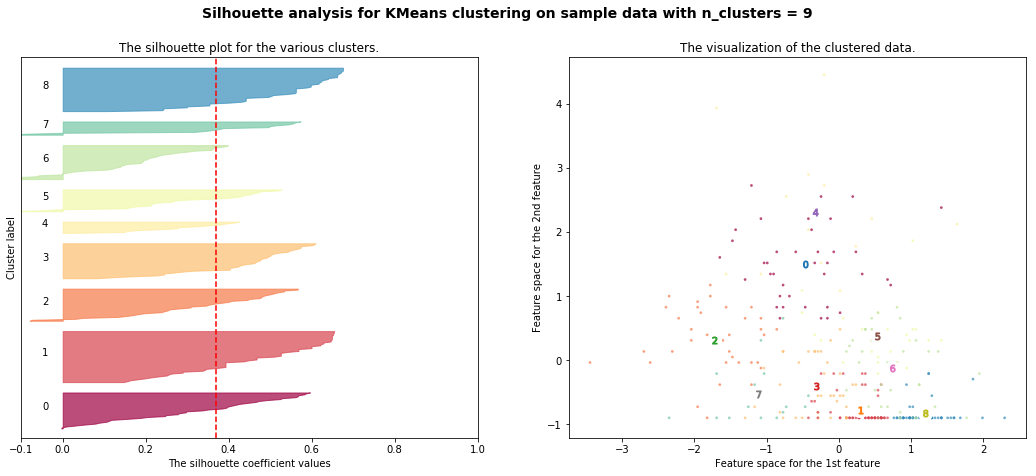

For n_clusters = 10 The average silhouette_score is : 0.3760375020402585


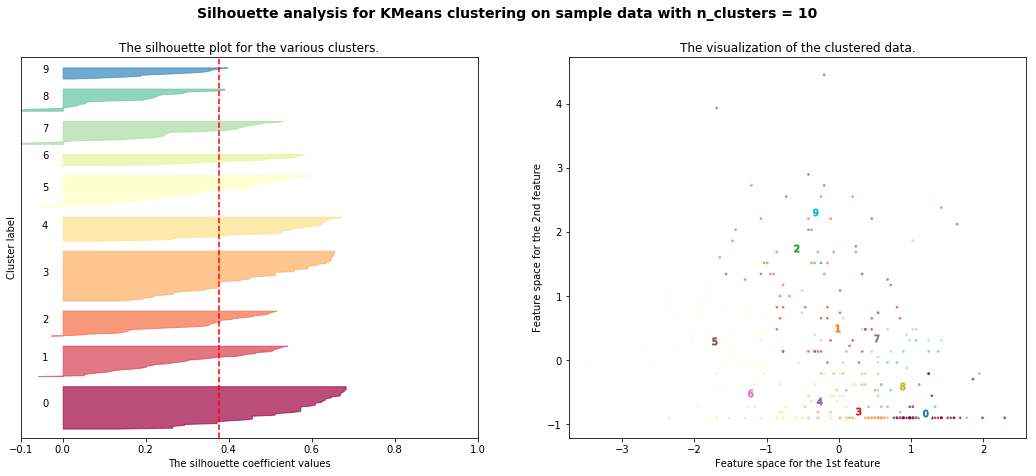

For n_clusters = 11 The average silhouette_score is : 0.38297770010049825


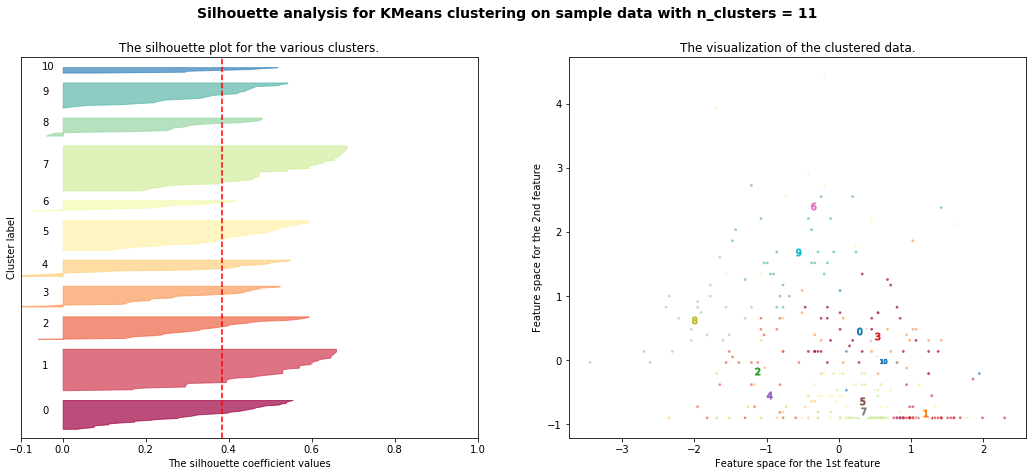

For n_clusters = 12 The average silhouette_score is : 0.3875700032269085


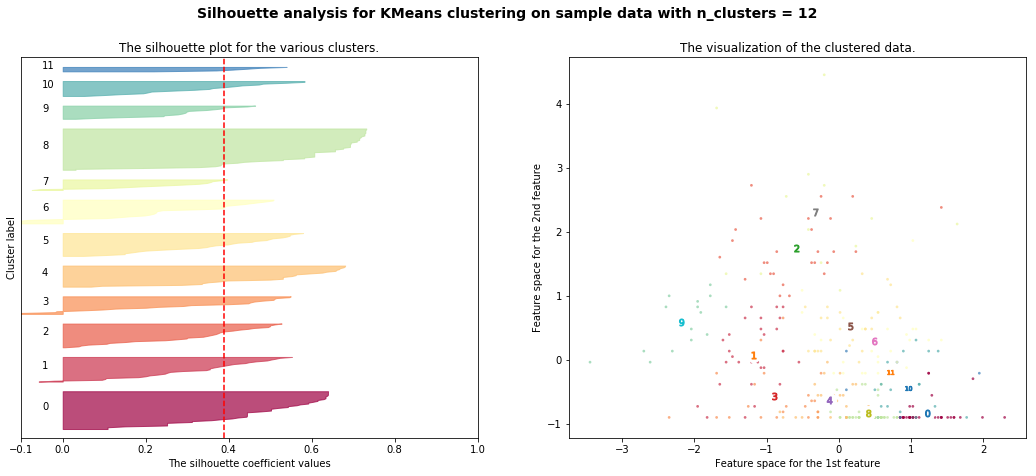

For n_clusters = 13 The average silhouette_score is : 0.3863419307946591


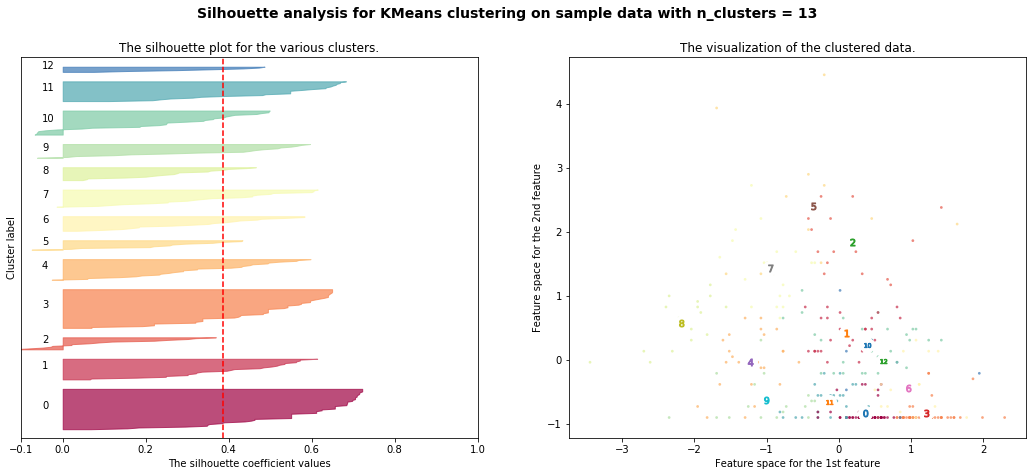

For n_clusters = 14 The average silhouette_score is : 0.39577555685849464


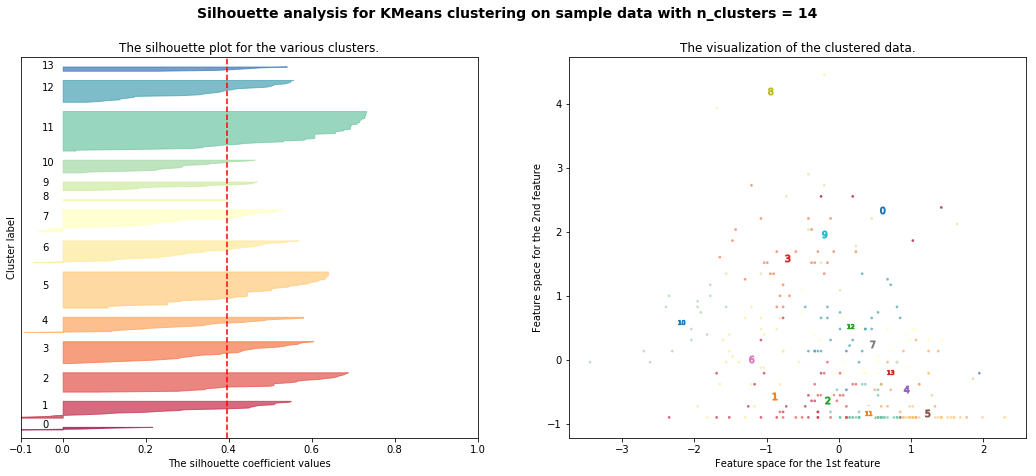

For n_clusters = 15 The average silhouette_score is : 0.39214415087625915


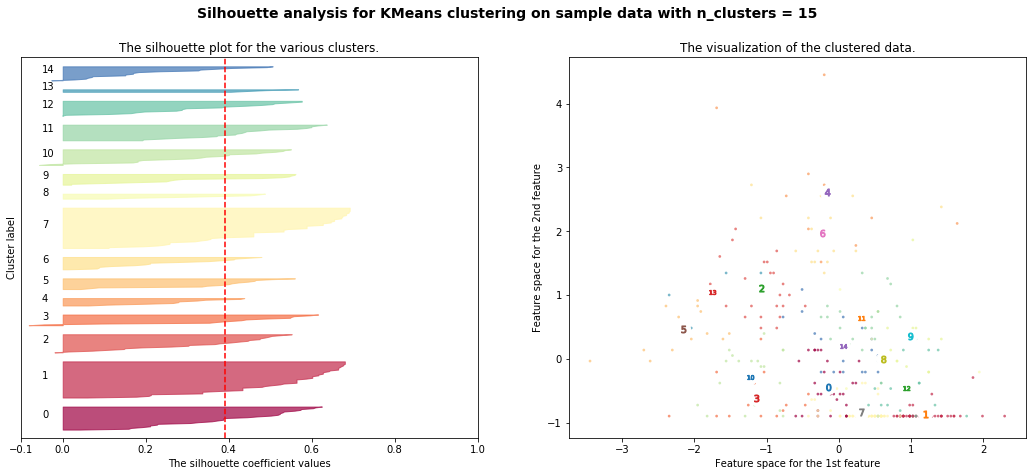

In [229]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()